In [10]:
!git clone https://github.com/opt-gaobin/speig.git

Cloning into 'speig'...


In [5]:
import deepquantum as dq
import deepquantum.photonic as dqp
import torch
import torch.nn as nn
import numpy as np

In [16]:
torch.rand(1)[0] * 2 * torch.pi

tensor(5.0247)

In [ ]:
NL = np.arange(40, -1, -1)
NL

array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

In [11]:
import numpy as np
import scipy.linalg as la

def symplectic_eigenvalues_and_decomposition(V):
    # Ensure V is a symmetric and positive-definite matrix
    assert np.allclose(V, V.T), "Matrix V must be symmetric"
    assert np.all(np.linalg.eigvals(V) > 0), "Matrix V must be positive-definite"

    n = V.shape[0] // 2

    # Define the symplectic matrix J
    J = np.block([[np.zeros((n, n)), np.eye(n)],
                  [-np.eye(n), np.zeros((n, n))]])

    # Compute i * J * V
    iJV = 1j * J @ V

    # Calculate the eigenvalues and eigenvectors of iJV
    eigvals, eigvecs = np.linalg.eig(iJV)

    print(eigvals)
    # The symplectic eigenvalues are the positive halves of the absolute values
    symplectic_eigenvalues = np.sort(np.abs(eigvals))[:n] / 2.0

    # Construct the diagonal matrix D with the symplectic eigenvalues
    D = np.diag(symplectic_eigenvalues)

    # Construct the symplectic diagonalizing matrix S
    S = eigvecs[:, :n] @ np.sqrt(2 * D)

    # Construct D ⊕ D (a block diagonal matrix with D and D)
    D_oplus_D = np.block([[D, np.zeros_like(D)], [np.zeros_like(D), D]])

    # Verify the condition V = S^T (D ⊕ D) S
    V_reconstructed = S.T @ D_oplus_D @ S
    verification = np.allclose(V, V_reconstructed, atol=1e-10)

    return S, D, symplectic_eigenvalues, verification

# Example usage
V = np.array([[2, 0, 0, 1],
              [0, 2, -1, 0],
              [0, -1, 2, 0],
              [1, 0, 0, 2]])

S, D, symplectic_eigs, is_verified = symplectic_eigenvalues_and_decomposition(V)

print("Symplectic Eigenvalues:", symplectic_eigs)
print("Matrix D:\n", D)
print("Matrix S:\n", S)
print("Verification (V = S^T (D ⊕ D) S):", is_verified)


[ 3.+2.48253415e-17j -3.-2.48253415e-17j  1.-2.48253415e-17j
 -1.+2.48253415e-17j]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [23]:
V = np.array([[2, 0, 0, 1],
              [0, 2, -1, 0],
              [0, -1, 2, 0],
              [1, 0, 0, 2]])    

n = V.shape[0] // 2

# Define the symplectic matrix J
J = np.block([[np.zeros((n, n)), np.eye(n)],
                [-np.eye(n), np.zeros((n, n))]])

# Compute i * J * V
iJV = 1j * J @ V

# Calculate the eigenvalues and eigenvectors of iJV
eigvals, eigvecs = np.linalg.eig(iJV)

print(eigvals)
print(np.sort(np.abs(eigvals)))
print(np.sort(np.abs(eigvals))[:n*2:2])

# The symplectic eigenvalues are the positive halves of the absolute values
symplectic_eigenvalues = np.sort(np.abs(eigvals))[:n*2:2] / 2.0

# Construct the diagonal matrix D with the symplectic eigenvalues
D = np.diag(symplectic_eigenvalues)
print(D)

# Construct the symplectic diagonalizing matrix S
S = 

# Construct D ⊕ D (a block diagonal matrix with D and D)
D_oplus_D = np.block([[D, np.zeros_like(D)], [np.zeros_like(D), D]])
print(D_oplus_D)

# Verify the condition V = S^T (D ⊕ D) S
V_reconstructed = S.T @ D_oplus_D @ S
print(V_reconstructed)
verification = np.allclose(V, V_reconstructed, atol=1e-10)

[ 3.+2.48253415e-17j -3.-2.48253415e-17j  1.-2.48253415e-17j
 -1.+2.48253415e-17j]
[1. 1. 3. 3.]
[1. 3.]
[[0.5 0. ]
 [0.  1.5]]
[[ 5.00000000e-01+0.00000000e+00j  8.66025404e-01+6.44981293e-17j]
 [ 4.13755692e-17+5.00000000e-01j -7.16645881e-18-8.66025404e-01j]
 [-4.13755692e-17-5.00000000e-01j  7.16645881e-18+8.66025404e-01j]
 [ 5.00000000e-01-3.72380123e-17j  8.66025404e-01+0.00000000e+00j]]
[[0.5 0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1.5]]
[[7.21644966e-16+2.68941200e-17j 1.73205081e+00-1.11080112e-16j]
 [1.73205081e+00-1.11080112e-16j 2.22044605e-15+8.06823600e-17j]]
[[ 2  0  0  1]
 [ 0  2 -1  0]
 [ 0 -1  2  0]
 [ 1  0  0  2]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

In [2]:
np.linalg.eigvals(V)

array([3., 1., 3., 1.])

In [10]:
import numpy as np

def calculate_B(A, C):
    # Determine the shape of matrices A and C
    m, n = A.shape
    mp, nq = C.shape
    
    # Compute the size of B
    p = mp // m
    q = nq // n

    # Initialize B with zeros, ensure the dtype is float
    B = np.zeros((p, q), dtype=float)

    # Compute B
    for i in range(m):
        for j in range(n):
            # Extract the block from C
            block = C[i*p:(i+1)*p, j*q:(j+1)*q]
            # Divide the block by the corresponding element of A
            B = block / A[i, j]

    return B

# Example matrices A and C
A = np.array([[1, 2], [3, 4]])
C = np.array([[1, 2, 2, 4],
              [3, 4, 6, 8],
              [3, 6, 4, 8],
              [9, 12, 12, 16]])

# Calculate B
B = calculate_B(A, C)
print("Matrix B:")
print(B)


Matrix B:
[[1. 2.]
 [3. 4.]]


In [29]:
J @ J

array([[-1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.]])

In [6]:
from numba import njit
import numpy as np

@njit
def calculate_B(A, C):
    return np.dot(A, C)

calculate_B(np.array([[1, 2], [3, 4]]), np.array([[1, 2], [3, 4]]))

TypeError: unsupported dtype for <BLAS function>()

In [122]:
import numpy as np

# Example matrix V
V = np.array([[1, 0.5, 0, 0],
              [0.5, 1, 0, 0],
              [0, 0, 1, -0.5],
              [0, 0, -0.5, 1]])

# 创建一个高斯分布的数据集
# np.random.seed(0)
data = np.random.randn(1000, 8)  # 生成100个二维高斯样本

# 计算样本的协方差矩阵
cov_matrix = np.cov(data, rowvar=False)

V = cov_matrix

eigvals, eigvecs = np.linalg.eig(V)
print("Eigenvalues of V:\n", eigvals)

# eigvals > 0
print("Eigenvalues > 0:", eigvals[eigvals > 0])

n = V.shape[0] // 2
In = np.eye(n)
J = np.block([[np.zeros((n, n)), -In], [In, np.zeros((n, n))]])

# print("Matrix J:\n", J)

# Compute the spectral decomposition of iJV
eigvals, eigvecs = np.linalg.eig(1j * J @ V)
print("Eigenvalues of iJV:\n", eigvals)

# Compute the matrix B: iJV = B D B^(-1)
B = eigvecs
sigmaz_Dn = np.diag(eigvals)
B_inv = np.linalg.inv(B)

# print("sigmaz_Dn:\n", sigmaz_Dn)
# print("Matrix B:\n", B)

# Verify the decomposition
check_matrix = B @ sigmaz_Dn @ B_inv
# print("Matrix B D B^(-1):\n", check_matrix)
# print("Matrix iJV:\n", 1j * J @ V)
# print("Verification:", np.allclose(1j * J @ V, check_matrix))

U2 = 1/np.sqrt(2) * np.array([[1, 1], [1j, -1j]])

# Compute matrix S
S = J.T @ B @ np.kron(np.conjugate(U2).T, In) @ J
# print("Matrix S:\n", S)

Dn = np.diag(eigvals[:n])
# print("Matrix Dn:\n", Dn.real)

# Verify result
I2 = np.eye(2)
check_matrix = S @ np.kron(I2, Dn) @ S.T
# print("Matrix S (D ⊕ D) S^T:\n", check_matrix.real)
# print("Matrix V:\n", V)
# print("Verification:", np.allclose(V, check_matrix))

# sigma_z = np.array([[1, 0], [0, -1]])
# iJV = np.linalg.inv(S).T @ np.kron(U2, In) @ np.kron(sigma_z, Dn) @ np.kron(np.conjugate(U2).T, In) @ S.T
# print("Matrix iJV:\n", iJV)
# print("Verification:", np.allclose(iJV, 1j * J @ V))

import numpy as np

def symplectic_eigenvalues(cov_matrix, hbar=2):
    """
    Calculate the symplectic eigenvalues of a covariance matrix.

    Parameters:
    cov_matrix (np.ndarray): The covariance matrix (must be square).
    hbar (float): The reduced Planck constant (default 2).

    Returns:
    np.ndarray: The symplectic eigenvalues divided by hbar.
    """
    # Check that the covariance matrix is square
    if cov_matrix.shape[0] != cov_matrix.shape[1]:
        raise ValueError("Covariance matrix must be square")

    n = cov_matrix.shape[0] // 2

    # Construct the symplectic matrix Omega
    Omega = np.block([
        [np.zeros((n, n)), np.eye(n)],
        [-np.eye(n), np.zeros((n, n))]
    ])

    # Compute the symplectic matrix
    symplectic_matrix = np.dot(Omega, cov_matrix)

    # Compute the eigenvalues
    eigvals = np.linalg.eigvals(symplectic_matrix)

    # Compute the symplectic eigenvalues (absolute values, sorted, and take the first n)
    symplectic_eigenvals = np.sort(np.abs(eigvals))[:n]

    return symplectic_eigenvals / hbar


symplectic_eigenvalues(cov_matrix)

Eigenvalues of V:
 [0.85594729 0.89576838 1.1110189  1.10165722 1.05505768 1.02166161
 0.98540162 0.98905066]
Eigenvalues > 0: [0.85594729 0.89576838 1.1110189  1.10165722 1.05505768 1.02166161
 0.98540162 0.98905066]
Eigenvalues of iJV:
 [ 1.05655902-2.85619510e-18j  1.01914555-6.50178272e-17j
  0.97909723-3.78601562e-17j  0.94179654-2.38807882e-17j
 -1.05655902+5.47716216e-17j -0.94179654-2.27117790e-17j
 -1.01914555-5.32608983e-17j -0.97909723-3.42640797e-17j]


array([0.47089827, 0.47089827, 0.48954861, 0.48954861])

In [77]:
import numpy as np

def symplectic_eigenvalues(cov_matrix, hbar=2):
    """
    Calculate the symplectic eigenvalues of a covariance matrix.

    Parameters:
    cov_matrix (np.ndarray): The covariance matrix (must be square).
    hbar (float): The reduced Planck constant (default 2).

    Returns:
    np.ndarray: The symplectic eigenvalues divided by hbar.
    """
    # Check that the covariance matrix is square
    if cov_matrix.shape[0] != cov_matrix.shape[1]:
        raise ValueError("Covariance matrix must be square")

    n = cov_matrix.shape[0] // 2

    # Construct the symplectic matrix Omega
    Omega = np.block([
        [np.zeros((n, n)), np.eye(n)],
        [-np.eye(n), np.zeros((n, n))]
    ])

    # Compute the symplectic matrix
    symplectic_matrix = np.dot(Omega, cov_matrix)

    # Compute the eigenvalues
    eigvals = np.linalg.eigvals(symplectic_matrix)

    # Compute the symplectic eigenvalues (absolute values, sorted, and take the first n)
    symplectic_eigenvals = np.sort(np.abs(eigvals))[:n]

    return symplectic_eigenvals / hbar




array([[ 1.00000000e+00+5.62778643e-18j,  9.54097912e-18+8.21217103e-18j,
         2.08166817e-17+5.26608812e-17j,  5.55111512e-17-6.34066070e-17j],
       [ 5.68121938e-17+1.43913584e-17j,  1.00000000e+00+2.02950891e-17j,
         0.00000000e+00-2.64520958e-17j, -1.38777878e-17-5.40222128e-17j],
       [ 0.00000000e+00-7.45579591e-17j, -2.77555756e-17+8.03287846e-18j,
         1.00000000e+00+8.27727113e-20j,  2.16840434e-17+2.12429913e-17j],
       [ 2.77555756e-17-5.35943649e-17j, -1.38777878e-17+1.59365315e-17j,
         7.32920669e-17-2.44798538e-17j,  1.00000000e+00-2.68865305e-17j]])

In [66]:
import numpy as np

# 创建一个高斯分布的数据集
# np.random.seed(0)
data = np.random.randn(100, 4)  # 生成100个二维高斯样本

# 计算样本的协方差矩阵
cov_matrix = np.cov(data, rowvar=False)

print("协方差矩阵:")
print(cov_matrix)

# 验证对称性
print("协方差矩阵是否对称:", np.allclose(cov_matrix, cov_matrix.T))

# 验证半正定性
eigenvalues = np.linalg.eigvals(cov_matrix)
print("特征值:", eigenvalues)
print("特征值是否全非负:", np.all(eigenvalues >= 0))


协方差矩阵:
[[ 1.02386629  0.11945647 -0.02141193  0.1301739 ]
 [ 0.11945647  0.89232641  0.17300353 -0.13959024]
 [-0.02141193  0.17300353  0.80808533 -0.05702856]
 [ 0.1301739  -0.13959024 -0.05702856  0.89875216]]
协方差矩阵是否对称: True
特征值: [0.61520457 0.77198755 1.11237268 1.12346539]
特征值是否全非负: True


In [9]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

from matplotlib import rcParams
config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimHei'],
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

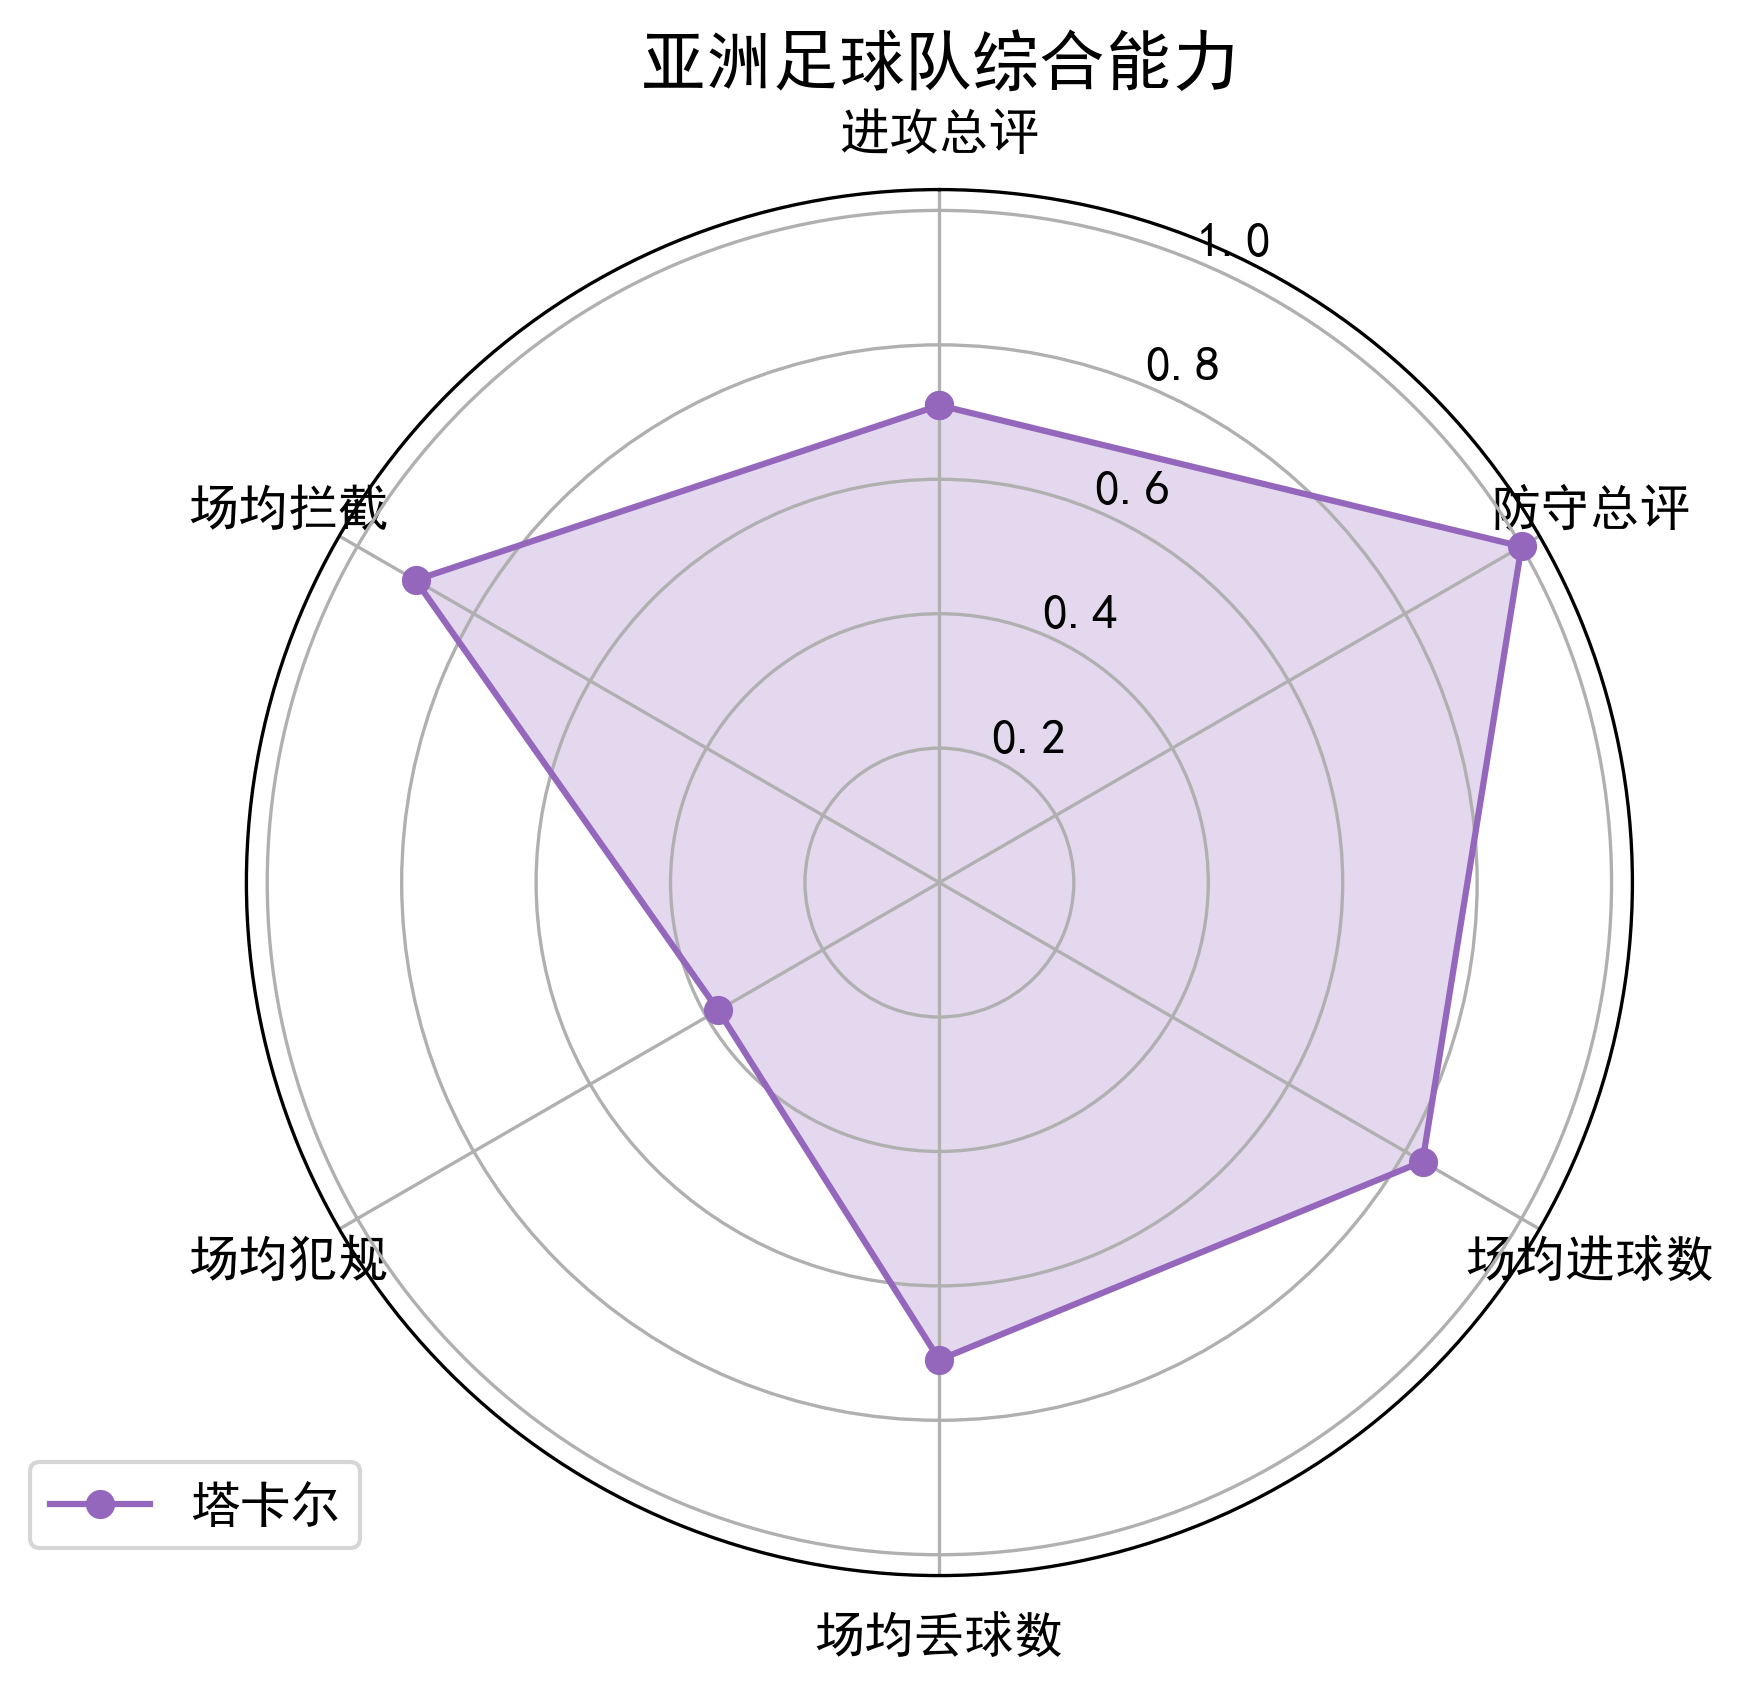

In [19]:
from matplotlib import pyplot as plt
import numpy as np

def plot_radar_chart(data, categories, labels=None, title=None):
    """
    绘制带填充颜色的雷达图。
    
    参数：
    data (numpy.ndarray): 包含数据的数组。每一行代表一个数据点，每一列代表一个维度。
    categories (list): 维度的名称列表，与数据数组的列对应。
    title (str): 图表标题（可选）。
    """
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # 使雷达图闭合
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True}, dpi=300)
    ax.set_theta_offset(np.pi / 2)  # 调整角度偏移，使0度从上方开始
    ax.set_theta_direction(-1)  # 逆时针方向绘制
    
    # 绘制雷达图，添加填充颜色
    for i, row in enumerate(data):
        values = np.concatenate((row, [row[0]]))  # 使雷达图闭合
        ax.plot(angles, values, label=labels[i], color=f'#9467bd', marker='o')
        ax.fill(angles, values, alpha=0.25, color=f'#9467bd')
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.yaxis.grid(True)
    ax.legend(loc='upper right', fontsize=12,
              bbox_to_anchor=(0.1, 0.1))
    
    if title:
        plt.title(title, fontsize=16)
    plt.savefig('塔卡尔.png', dpi=300, bbox_inches='tight')
    plt.show()

data = np.array([[0.71,	1,	0.83,	0.71,	0.38,	0.9], 
                 ])
# data = np.array([[0.63,	0.77,	0,	1,	0.19,	1], 
#                  [0.81,	0.63,	1,	0.07,	0,	0.78],
#                  [0.97,	0.63,	0.75,	0,	0.69,	0.89],
#                  [0.82,	0.74,	0.83,	0.36,	1,	0.6],
#                  [0.71,	1,	0.83,	0.71,	0.38,	0.9]])
categories = ['进攻总评', '防守总评', '场均进球数', '场均丢球数', '场均犯规', '场均拦截']
# labels = ['中国', '日本','韩国','伊朗','塔卡尔']
labels = ['塔卡尔']

plot_radar_chart(data, categories, labels, title='亚洲足球队综合能力')

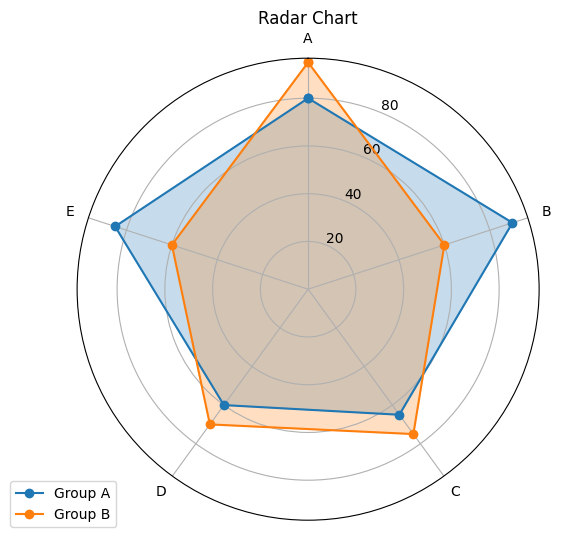

In [2]:
from sympy import symbols, Eq, solve
import numpy as np

def ray_plane_intersection(ray_origin, ray_direction, plane_points):
    """ 计算光线与平面的交点 """
    A, B, C, D = plane_points
    
    # 定义符号变量
    t = symbols('t')
    
    # 平面法向量
    plane_normal_vec = np.cross(B - A, C - A)
    
    # 光线参数方程
    ray_eq = ray_origin + t * ray_direction
    
    # 平面方程
    plane_eq = np.dot(plane_normal_vec, (ray_eq - A))
    
    # 解方程得到 t
    t_solution = solve(plane_eq, t)
    
    if not t_solution:
        return None
    
    t_val = t_solution[0]
    
    # 计算交点
    intersection_point = ray_origin + t_val * ray_direction
    
    # 检查交点是否在 ABCD 的凸包内
    if point_in_polygon_3d(intersection_point, plane_points):
        return intersection_point
    else:
        return None

def point_in_polygon_3d(point, polygon_points):
    """ 检查点是否在三维多边形内 """
    # 采用射线法判断点是否在多边形内部
    n = len(polygon_points)
    inside = False
    p1x, p1y, p1z = polygon_points[0]
    for i in range(n+1):
        p2x, p2y, p2z = polygon_points[i % n]
        if point[1] > min(p1y, p2y):
            if point[1] <= max(p1y, p2y):
                if point[0] <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (point[1]-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or point[0] <= xinters:
                        inside = not inside
        p1x, p1y, p1z = p2x, p2y, p2z
    return inside

def if_blocked_by_shawdow(ray_origin, ray_direction, A, B, C, D):
    """ 有交点返回0，无交点返回1 """
    # 判断光线和木板是否有交点
    intersection_point = ray_plane_intersection(ray_origin, ray_direction, [A, B, C, D])
    
    if intersection_point is not None:
        return 0
    else:
        return 1

# 示例用法
if __name__ == "__main__":
    # 光线起点和方向向量
    ray_origin = np.array([0, 0, 0], dtype=float)
    ray_direction = np.array([1, 1, 1], dtype=float)  # 方向向量必须是浮点数
    
    # 木板的四个顶点坐标
    A = np.array([1, 0, 0], dtype=float)
    B = np.array([0, 1, 0], dtype=float)
    C = np.array([0, 0, 1], dtype=float)
    D = np.array([1, 1, 1], dtype=float)
    
    print(if_blocked_by_shawdow(ray_origin, ray_direction, A, B, C, D))

0


  0%|          | 0/22 [00:00<?, ?it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
  5%|▍         | 1/22 [00:00<00:05,  3.93it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 14%|█▎        | 3/22 [00:00<00:04,  4.60it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 18%|█▊        | 4/22 [00:00<00:03,  5.00it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 32%|███▏      | 7/22 [00:01<00:01,  7.64it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
100%|██████████| 22/22 [00:01<00:00, 16.33it/s]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0, 0], nan, nan, 1.413716694115407, 0, nan, nan], [[0, 0], nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan], [nan, 1.413716694115407, 0], [[0, 0], nan, nan]]
  0%|          | 0/22 [00:00<?, ?it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
  5%|▍         | 1/22 [00:00<00:05,  3.51it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
  9%|▉         | 2/22 [00:00<00:04,  4.09it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 18%|█▊        | 4/22 [00:00<00:03,  4.85it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 32%|███▏      | 7/22 [00:01<00:01,  7.74it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
100%|██████████| 22/22 [00:01<00:00, 16.17it/s]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 0], nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 0], nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan], [nan, 1.413716694115407, 0], [[0.5, 0], nan, nan]]
  0%|          | 0/22 [00:00<?, ?it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
  5%|▍         | 1/22 [00:00<00:05,  4.02it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 14%|█▎        | 3/22 [00:00<00:04,  4.53it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 18%|█▊        | 4/22 [00:00<00:03,  4.96it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
 32%|███▏      | 7/22 [00:01<00:01,  7.81it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
100%|██████████| 22/22 [00:01<00:00, 16.48it/s]params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, 1.413716694115407, 0, nan, nan, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan, nan, nan, nan, nan], [nan, 1.413716694115407, 0, nan, nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan, 1.413716694115407, 0, nan, nan], [[0.5, 3.7699111843077517], nan, nan, nan, nan, nan, nan]]
params: [[[1.25, 0], nan, nan], [nan, 1.413716694115407, 0], [[0.5, 3.7699111843077517], nan, nan]]

